In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pickle as pickle
import pandas as pd
import math

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time
import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical

from keras.models import Sequential
from keras.models import load_model

from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization, Activation, Dropout, Flatten, Dense

from keras.layers import Bidirectional, TimeDistributed
from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.regularizers import l2

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
with open('/content/drive/MyDrive/DEAP/x_train.npy', 'rb') as file:
    x_train = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/y_train.npy', 'rb') as file:
    y_train = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/x_val.npy', 'rb') as file:
    x_val = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/y_val.npy', 'rb') as file:
    y_val = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/x_test.npy', 'rb') as file:
    x_test = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/y_test.npy', 'rb') as file:
    y_test = np.load(file, allow_pickle=True)

In [5]:
import random
import os

# Set the random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(31744, 37, 256)
(31744, 4)
(3968, 37, 256)
(3968, 4)
(3968, 37, 256)
(3968, 4)


In [7]:
scaler = StandardScaler()

In [8]:
num_samples1, channels1, data_points1 = x_train.shape
x_train = x_train.reshape(num_samples1, -1)  # Flatten the data to 2D
num_samples2, channels2, data_points2 = x_val.shape
x_val = x_val.reshape(num_samples2, -1)
num_samples3, channels3, data_points3 = x_test.shape
x_test = x_test.reshape(num_samples3, -1)

In [9]:
# Normalization -> Standardization
x_train = scaler.fit_transform(normalize(x_train))
x_val = scaler.transform(normalize(x_val))
x_test = scaler.transform(normalize(x_test))

In [10]:
x_train = x_train.reshape(num_samples1, channels1, data_points1).transpose(0, 2, 1)
x_val = x_val.reshape(num_samples2, channels2, data_points2).transpose(0, 2, 1)
x_test = x_test.reshape(num_samples3, channels3, data_points3).transpose(0, 2, 1)

In [11]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(31744, 256, 37)
(3968, 256, 37)
(3968, 256, 37)
(31744, 4)
(3968, 4)
(3968, 4)


In [12]:
input_shape=(x_train.shape[1],x_train.shape[2])
print(input_shape)

(256, 37)


In [13]:
batch_size = 64
num_classes = 4
epochs = 100
dropout_rate=0.2

In [14]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(dropout_rate))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(dropout_rate))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(dropout_rate))

model.add(LSTM(32))
model.add(Dropout(dropout_rate))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout_rate))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 128)          14336     
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 128)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 128)          49280     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 62, 128)           0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 128)           0

In [16]:
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/100
496/496 [==============================] - 11s 23ms/step - loss: 0.2526 - accuracy: 0.9068 - val_loss: 0.9082 - val_accuracy: 0.7470
Epoch 2/100
496/496 [==============================] - 11s 22ms/step - loss: 0.2368 - accuracy: 0.9113 - val_loss: 0.9207 - val_accuracy: 0.7470
Epoch 3/100
496/496 [==============================] - 11s 22ms/step - loss: 0.2402 - accuracy: 0.9093 - val_loss: 0.9000 - val_accuracy: 0.7371
Epoch 4/100
496/496 [==============================] - 11s 22ms/step - loss: 0.2393 - accuracy: 0.9104 - val_loss: 0.9393 - val_accuracy: 0.7409
Epoch 5/100
496/496 [==============================] - 11s 22ms/step - loss: 0.2583 - accuracy: 0.9057 - val_loss: 0.9127 - val_accuracy: 0.7414
Epoch 6/100
496/496 [==============================] - 11s 22ms/step - loss: 0.2347 - accuracy: 0.9122 - val_loss: 0.8974 - val_accuracy: 0.7442
Epoch 7/100
496/496 [==============================] - 10s 21ms/step - loss: 0.2415 - accuracy: 0.9093 - val_loss: 0.9040 - val_ac

In [17]:
score_2 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

124/124 [==============================] - 2s 8ms/step - loss: 0.9339 - accuracy: 0.7452
Test loss: 0.9339302778244019
Test accuracy: 0.7452117204666138


In [19]:
model.save('/content/drive/MyDrive/DEAP/model/combined_model.h5')
np.save('/content/drive/MyDrive/DEAP/model/combined_model.npy', history.history)

In [21]:
directory = '/content/drive/MyDrive/DEAP/model/combined_model.h5'
bilstm_model = load_model(directory)
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 128)          14336     
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 128)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 128)          49280     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 62, 128)           0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 128)           0

In [22]:
bilstm_history = np.load('/content/drive/MyDrive/DEAP/model/combined_model.npy',allow_pickle='TRUE').item()
bilstm_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
print("Training Accuracy: ", np.max(bilstm_history['accuracy']))
print("Training Loss: ", np.min(bilstm_history['loss']))
print("Validation Accuracy: ", np.max(bilstm_history['val_accuracy']))
print("Validation Loss: ", np.min(bilstm_history['val_loss']))

Training Accuracy:  0.9327747225761414
Training Loss:  0.1882316768169403
Validation Accuracy:  0.7588205933570862
Validation Loss:  0.8882662057876587


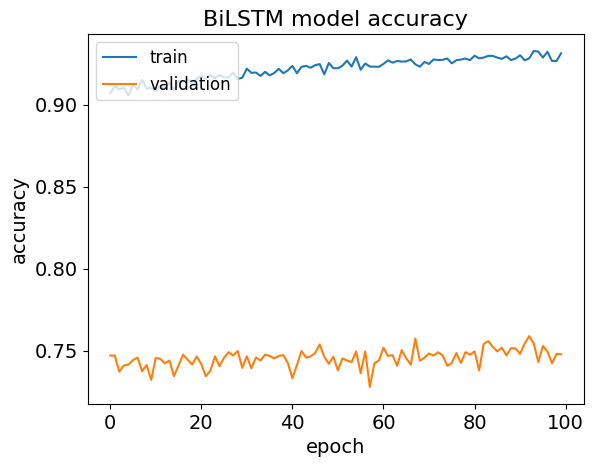

In [24]:
# summarize history for accuracy
plt.plot(bilstm_history['accuracy'])
plt.plot(bilstm_history['val_accuracy'])
plt.title('BiLSTM model accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

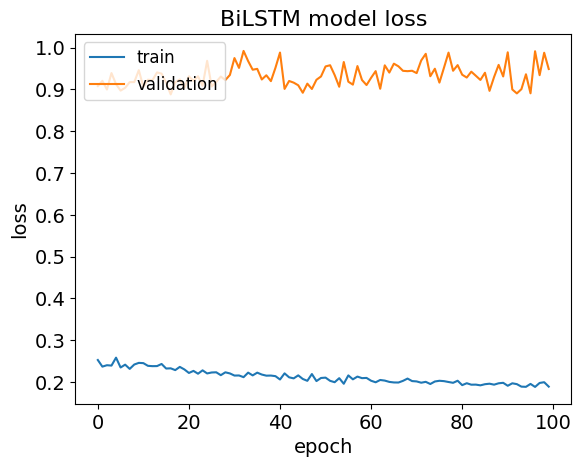

In [25]:
# summarize history for loss
plt.plot(bilstm_history['loss'])
plt.plot(bilstm_history['val_loss'])
plt.title('BiLSTM model loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

124/124 [==============================] - 2s 8ms/step


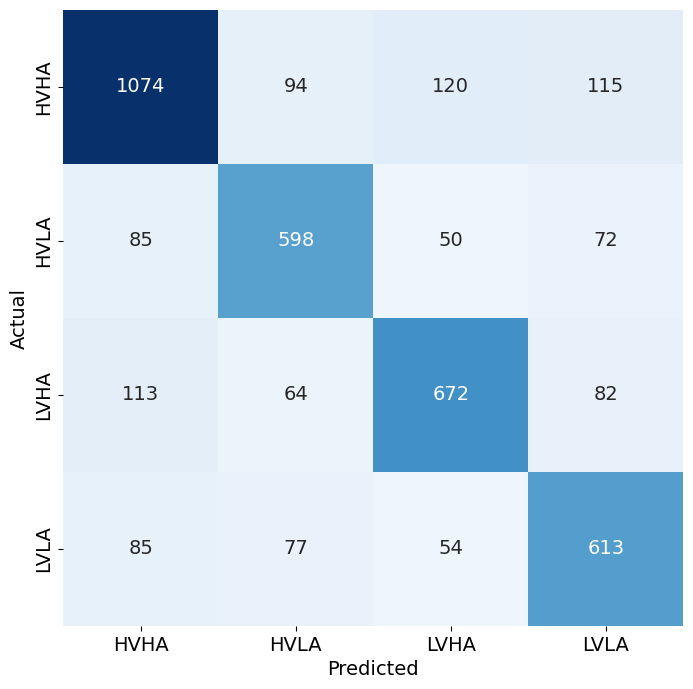

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1403
           1       0.72      0.74      0.73       805
           2       0.75      0.72      0.74       931
           3       0.70      0.74      0.72       829

    accuracy                           0.75      3968
   macro avg       0.74      0.74      0.74      3968
weighted avg       0.75      0.75      0.75      3968



In [26]:
import seaborn as sns
class_names = ['HVHA', 'HVLA', 'LVHA', 'LVLA']

y_pred = bilstm_model.predict(x_test)

y_predict = []

for i in range(len(y_pred)):
    y_predict.append(np.argmax(y_pred[i]))

y_predict = np.array(y_predict)
yt_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(yt_test, y_predict)
clr = classification_report(yt_test, y_predict)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues', annot_kws={"size":14})
plt.xticks(np.arange(4) + 0.5, class_names, fontsize=14)
plt.yticks(np.arange(4) + 0.5, class_names, fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
# plt.title("Confusion Matrix for GRU Model")
plt.show()

print("Classification Report:\n----------------------\n", clr)